In [44]:
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


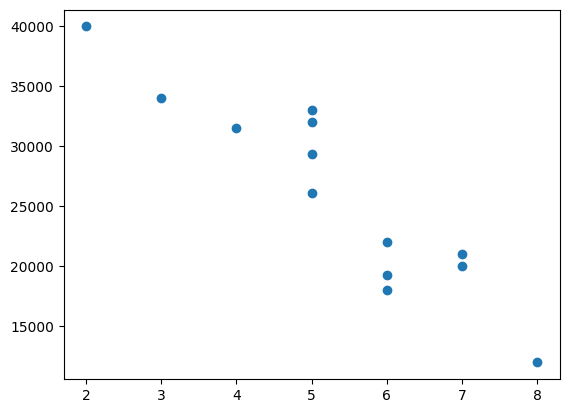

In [46]:
import matplotlib.pyplot as plt

plt.scatter(df['Age(yrs)'], df['Sell Price($)'])

In [47]:
dummies = pd.get_dummies(df["Car Model"])

In [48]:
df = pd.concat([df, dummies], axis='columns')
df

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [49]:
df1 = df.drop(["Car Model", "Mercedez Benz C class"], axis='columns')
df1

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,False,True
1,35000,34000,3,False,True
2,57000,26100,5,False,True
3,22500,40000,2,False,True
4,46000,31500,4,False,True
5,59000,29400,5,True,False
6,52000,32000,5,True,False
7,72000,19300,6,True,False
8,91000,12000,8,True,False
9,67000,22000,6,False,False


In [50]:
x = df1.drop('Sell Price($)', axis='columns')
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,False,True
1,35000,3,False,True
2,57000,5,False,True
3,22500,2,False,True
4,46000,4,False,True
5,59000,5,True,False
6,52000,5,True,False
7,72000,6,True,False
8,91000,8,True,False
9,67000,6,False,False


In [51]:
y = df1['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [53]:
lr.fit(x, y)
lr.score(x, y)

0.9417050937281082

In [54]:
# predicting the price of a car
# Here the arguements must be in the same order as the columns in x
# The first two are the mileage and age, and the rest are the dummy variables for the car models
# So the order of x1 is [ mileage, age, model1, model2, ... ]
def predict_price(model, mileage, age, x_columns):
    x1 = np.zeros(len(x_columns))
    x1[0] = mileage
    x1[1] = age
    # Find model index if it exists
    model_indices = np.where(x_columns == model)[0]
    if len(model_indices) > 0:
       model_index = model_indices[0]
       x1[model_index] = 1
    # else: if model is the dropped one, do nothing (all zeros is correct) 
    return lr.predict([x1])[0]

In [55]:
predict_price('Mercedez Benz C class', 45000, 4, x.columns)

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(36991.317210612826)

In [56]:
predict_price("BMW X5", 86000, 7, x.columns)

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(11080.74313219064)